<a href="https://colab.research.google.com/github/gmauricio-toledo/NLP-LCC/blob/main/Notebooks/P02-SVD_Espacios_Latentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/gmauricio-toledo/NLP-LCC/main/Archivos/MovieRatings.xlsx"
df = pd.read_excel(url)
df.head()


,Unnamed: 0,Spider-Man (2002),The Avengers (2012),Cars (2006),The Incredibles (2004),Toy Story 3 (2010),Spider-Man: No Way Home (2021),Guardians of the Galaxy (2014),Avengers: Infinity War (2018),Avengers: Endgame (2019),...,Harry Potter and the Prisoner of Azkaban (2004),Interstellar (2014),Avatar: The Way of Water (2022),The Batman (2022),Oppenheimer (2023),Barbie (2023),Dune (2021),Star Wars: The Force Awakens (2015),Blade Runner 2049 (2017),La La Land (2016)
0,BALDERRAMA DOMINGUEZ GAEL,8,9,9,10,9,8.0,10.0,9.0,10.0,...,7.0,10.0,9.0,10.0,NaN,8.0,NaN,NaN,8.0,10.0
1,CASTRO LERMA MARIO ALEJANDRO,9,9,9,9,9,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DURAZO BARTOLINI ANGEL DAVID,10,8,10,10,8,8.0,10.0,9.0,9.0,...,1.0,10.0,NaN,NaN,10.0,1.0,5.0,NaN,NaN,NaN
3,FLORES ALVAREZ CHRISTIAN ALEXIS,10,8,10,10,9,7.0,10.0,8.0,10.0,...,9.0,10.0,8.0,NaN,10.0,3.0,NaN,NaN,NaN,NaN
4,FLORES BRIONES JESUS ANTONIO,10,8,5,7,8,6.0,7.0,7.0,7.0,...,8.0,10.0,8.0,10.0,10.0,7.0,10.0,7.0,10.0,9.0


In [ ]:
#droppeando la primera coumna con los nombres
df_no_names = df.drop(columns=['Unnamed: 0'])
df_no_names

,Spider-Man (2002),The Avengers (2012),Cars (2006),The Incredibles (2004),Toy Story 3 (2010),Spider-Man: No Way Home (2021),Guardians of the Galaxy (2014),Avengers: Infinity War (2018),Avengers: Endgame (2019),Finding Nemo (2003),...,Harry Potter and the Prisoner of Azkaban (2004),Interstellar (2014),Avatar: The Way of Water (2022),The Batman (2022),Oppenheimer (2023),Barbie (2023),Dune (2021),Star Wars: The Force Awakens (2015),Blade Runner 2049 (2017),La La Land (2016)
0,8,9,9,10,9,8.0,10.0,9.0,10.0,8,...,7.0,10.0,9.0,10.0,NaN,8.0,NaN,NaN,8.0,10.0
1,9,9,9,9,9,NaN,8.0,NaN,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,8,10,10,8,8.0,10.0,9.0,9.0,9,...,1.0,10.0,NaN,NaN,10.0,1.0,5.0,NaN,NaN,NaN
3,10,8,10,10,9,7.0,10.0,8.0,10.0,8,...,9.0,10.0,8.0,NaN,10.0,3.0,NaN,NaN,NaN,NaN
4,10,8,5,7,8,6.0,7.0,7.0,7.0,6,...,8.0,10.0,8.0,10.0,10.0,7.0,10.0,7.0,10.0,9.0
5,8,8,10,10,9,7.0,NaN,9.0,9.0,7,...,NaN,NaN,NaN,8.0,10.0,8.0,NaN,7.0,8.0,10.0
6,7,8,8,9,7,NaN,9.0,NaN,NaN,8,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
7,10,7,7,8,9,6.0,9.0,8.0,8.0,9,...,7.0,NaN,NaN,10.0,9.0,8.0,5.0,3.0,9.0,9.0
8,7,8,9,8,8,NaN,8.0,8.0,9.0,9,...,8.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8,8,9,9,6,7.0,9.0,9.0,5.0,9,...,8.0,10.0,7.0,8.0,10.0,7.0,10.0,4.0,NaN,9.0


In [ ]:
#Utilizando simple imputer para los datos faltantes
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_no_names), columns=df_no_names.columns)
df_imputed

,Spider-Man (2002),The Avengers (2012),Cars (2006),The Incredibles (2004),Toy Story 3 (2010),Spider-Man: No Way Home (2021),Guardians of the Galaxy (2014),Avengers: Infinity War (2018),Avengers: Endgame (2019),Finding Nemo (2003),...,Harry Potter and the Prisoner of Azkaban (2004),Interstellar (2014),Avatar: The Way of Water (2022),The Batman (2022),Oppenheimer (2023),Barbie (2023),Dune (2021),Star Wars: The Force Awakens (2015),Blade Runner 2049 (2017),La La Land (2016)
0,8.0,9.0,9.0,10.0,9.0,8.000000,10.000000,9.000000,10.000000,8.0,...,7.000000,10.000000,9.000,10.0,9.714286,8.0,7.875,6.166667,8.000000,10.0
1,9.0,9.0,9.0,9.0,9.0,7.416667,8.000000,8.692308,8.769231,9.0,...,7.454545,9.888889,8.125,9.0,9.714286,6.4,7.875,6.166667,8.666667,9.0
2,10.0,8.0,10.0,10.0,8.0,8.000000,10.000000,9.000000,9.000000,9.0,...,1.000000,10.000000,8.125,9.0,10.000000,1.0,5.000,6.166667,8.666667,9.0
3,10.0,8.0,10.0,10.0,9.0,7.000000,10.000000,8.000000,10.000000,8.0,...,9.000000,10.000000,8.000,9.0,10.000000,3.0,7.875,6.166667,8.666667,9.0
4,10.0,8.0,5.0,7.0,8.0,6.000000,7.000000,7.000000,7.000000,6.0,...,8.000000,10.000000,8.000,10.0,10.000000,7.0,10.000,7.000000,10.000000,9.0
5,8.0,8.0,10.0,10.0,9.0,7.000000,8.928571,9.000000,9.000000,7.0,...,7.454545,9.888889,8.125,8.0,10.000000,8.0,7.875,7.000000,8.000000,10.0
6,7.0,8.0,8.0,9.0,7.0,7.416667,9.000000,8.692308,8.769231,8.0,...,8.000000,9.888889,8.125,9.0,9.714286,6.4,7.875,7.000000,8.666667,9.0
7,10.0,7.0,7.0,8.0,9.0,6.000000,9.000000,8.000000,8.000000,9.0,...,7.000000,9.888889,8.125,10.0,9.000000,8.0,5.000,3.000000,9.000000,9.0
8,7.0,8.0,9.0,8.0,8.0,7.416667,8.000000,8.000000,9.000000,9.0,...,8.000000,10.000000,8.000,9.0,9.714286,6.4,7.875,6.166667,8.666667,9.0
9,8.0,8.0,9.0,9.0,6.0,7.000000,9.000000,9.000000,5.000000,9.0,...,8.000000,10.000000,7.000,8.0,10.000000,7.0,10.000,4.000000,8.666667,9.0


In [ ]:
#Haciendo truncatedSVD con n_components < #peliculas
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20)
X_transformed = svd.fit_transform(df_imputed)
X_transformed

array([[ 4.76989059e+01,  7.87542199e-01,  1.89162437e+00,
        -6.70819091e-02,  7.24800809e-01, -4.06490650e-01,
         4.13916271e-01, -1.44363334e+00, -1.21593933e+00,
        -7.63596224e-01, -1.53012023e+00,  1.22252283e+00,
         1.17791170e+00,  2.80742528e-01,  3.00632639e-01],
       [ 4.61305679e+01,  5.70386240e-01,  1.49601727e+00,
        -2.90784384e-01, -1.06115410e+00,  7.04248111e-01,
         6.79445919e-01,  6.00151240e-01,  2.11100157e-01,
         4.17499019e-01, -1.02191828e+00, -1.90367502e+00,
        -1.98740624e-01,  4.75338449e-01,  9.52586504e-01],
       [ 4.27367738e+01, -1.37526206e+01, -9.56642023e-01,
        -7.73331610e-01,  3.04319571e-01, -3.36256026e-01,
        -9.86262373e-01,  3.40658930e-01, -6.70016373e-01,
         2.47999255e-01, -2.98255385e-01, -2.04803680e-01,
        -2.95245748e-02,  1.07294026e-01, -2.58360986e-01],
       [ 4.63650381e+01, -2.86515988e+00, -9.83245584e-02,
         8.49297756e-01, -2.68821680e+00,  1.14836557

In [ ]:
#Matriz components_
components = svd.components_
components

array([[ 0.19270134,  0.1828286 ,  0.18399786,  0.20167218,  0.17848015,
         0.16422435,  0.19755318,  0.19196634,  0.19403924,  0.1809871 ,
         0.16157365,  0.20048766,  0.17899646,  0.18312229,  0.19178704,
         0.20935136,  0.16586374,  0.13496611,  0.17306754,  0.15685912,
         0.16480594,  0.21798752,  0.17933971,  0.19853572,  0.21413   ,
         0.14154905,  0.17400463,  0.13627135,  0.19097719,  0.19891489],
       [-0.1317973 , -0.00721909, -0.19570974, -0.10627054, -0.03216519,
        -0.06747553, -0.15849751, -0.04266007, -0.0767995 , -0.07254884,
         0.376563  , -0.11806392, -0.16936653, -0.15018345, -0.00759016,
        -0.04680946, -0.06090164,  0.31970494, -0.13269821,  0.45616482,
         0.39814554, -0.03162098, -0.01129658, -0.01960804, -0.03595446,
         0.39391319,  0.1728092 , -0.01668629, -0.00819276, -0.04180274],
       [-0.10097238,  0.02166181,  0.00649306,  0.06458272,  0.18802733,
         0.08449727,  0.062152  ,  0.0441704 ,  0

In [ ]:
#transponer n_components
componets = components.T

In [ ]:
# Select the same columns used during fit_transform, but use the imputed DataFrame
X_transformed = svd.transform(df_imputed)
X_transformed

array([[ 4.76989059e+01,  7.87542199e-01,  1.89162437e+00,
        -6.70819091e-02,  7.24800809e-01, -4.06490650e-01,
         4.13916271e-01, -1.44363334e+00, -1.21593933e+00,
        -7.63596224e-01, -1.53012023e+00,  1.22252283e+00,
         1.17791170e+00,  2.80742528e-01,  3.00632639e-01],
       [ 4.61305679e+01,  5.70386240e-01,  1.49601727e+00,
        -2.90784384e-01, -1.06115410e+00,  7.04248111e-01,
         6.79445919e-01,  6.00151240e-01,  2.11100157e-01,
         4.17499019e-01, -1.02191828e+00, -1.90367502e+00,
        -1.98740624e-01,  4.75338449e-01,  9.52586504e-01],
       [ 4.27367738e+01, -1.37526206e+01, -9.56642023e-01,
        -7.73331610e-01,  3.04319571e-01, -3.36256026e-01,
        -9.86262373e-01,  3.40658930e-01, -6.70016373e-01,
         2.47999255e-01, -2.98255385e-01, -2.04803680e-01,
        -2.95245748e-02,  1.07294026e-01, -2.58360986e-01],
       [ 4.63650381e+01, -2.86515988e+00, -9.83245584e-02,
         8.49297756e-01, -2.68821680e+00,  1.14836557

⭕ Dos cosas:

1. Ambos argmax son con el mismo `axis=0`. El `x_arg` es correcto, representa con qué grupo de películas es más afín cada uno de ustedes 15. Por eso es un vector de tamaño 15.
2. El mapa de calor que muestras correlo otra vez, no tiene sentido que sea una matriz de 15$\times$15

In [ ]:
#aplicando numpy.argmax
from numpy import argmax

x_arg = argmax(X_transformed, axis=0)
x_arg


array([12,  4, 12, 14, 12,  4,  3, 13, 14,  8, 11,  0, 11, 14,  1])

In [ ]:
#aplicandosela a components
components_arg = argmax(components.T, axis=1)
components_arg

array([10, 12,  6,  0,  6,  4, 11,  0, 11,  7,  2,  8,  9, 10, 13, 11,  6,
        2,  7,  1,  1, 14,  0, 12,  0,  1,  5,  3,  0,  4])

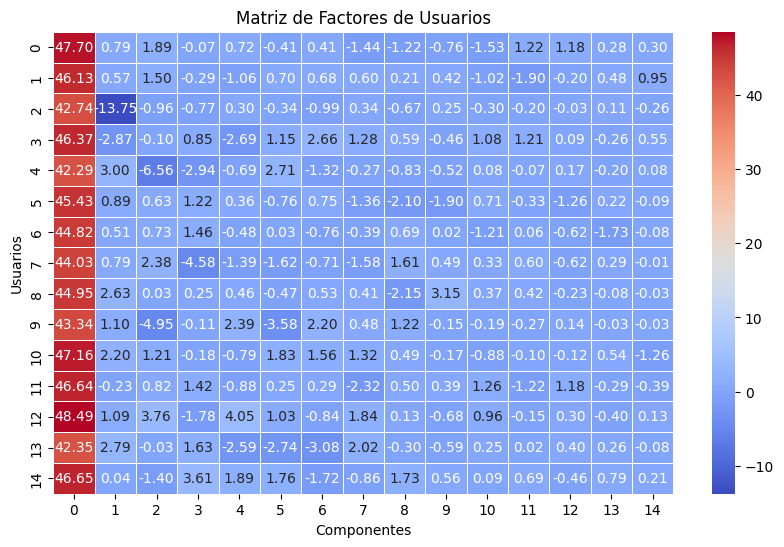

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(svd.transform(df_imputed), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Factores de Usuarios')
plt.xlabel('Componentes')
plt.ylabel('Usuarios')
plt.show()